In [ ]:
#In the event of a major earthquake, un-reinforced masonry (URM) buildings are considered to be among the most hazardous 
#structures to occupy. As seismologists become increasingly aware of the potential for major earthquakes in the Pacific 
#Northwest, the municipal gonvernment of Seattle has compiled a list of URM buildings throughout the city. Structural engineers 
#have evaluated each building for risk level based primarily on whether it is known to have adequate seismic retrofits.
#This project involves an analysis of Seattle's list of URM buildings to glean some insights into relative risk levels for 
#various public buildings. The project is intended to be self-documenting. Source data is publicly available and can be found at 
#https://data.seattle.gov/Permitting/Unreinforced-Masonry-Buildings/54qs-2h7f
#Much more information about Washington's un-preparedness for a major earthquake and the inspiration for this project can be 
#found at http://projects.seattletimes.com/2016/seismic-neglect/

In [18]:
import numpy as num
import pandas as pan
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#Create a dataframe using Pandas read_csv()
urm = pan.read_csv('C:/Users/brent/Downloads/Unreinforced_Masonry_Buildings.csv') 

In [3]:
urm.head(50) #Let's take a flying look at the top 50 lines in the dataset.

,Preliminary Risk Category,Neighborhood,Address,Year Built,No. Stories,Retrofit Level,Building Use,Estimated Number of Occupants,Confirmation Source
0,Medium Risk,Pioneer Square/Chinatown International District,1 Yesler Way,1911,3,Permitted Retrofit,Commercial/Office,11-100,Google Street View
1,High Risk,Pioneer Square/Chinatown International District,100 6th Ave S,1903,5,Visible retrofit,Residential,11-100,Photos from Previous Surveys
2,High Risk,Duwamish/SODO,100 S King St,1907,6,Permitted Retrofit,Commercial/Office,101+,Field Visit
3,Medium Risk,Queen Anne,100 W Highland Dr,1921,4,No visible retrofit,Residential,101+,Google Street View
4,High Risk,Queen Anne,100 W Roy St,1912,3,Visible retrofit,Public Assembly,101+,Permit Drawing Review
5,High Risk,Duwamish/SODO,1000 1st Ave S,1910,6,Substantial Alteration,Commercial/Office,101+,Google Street View
6,Medium Risk,First Hill,1000 Madison St,1930,2,No visible retrofit,Commercial,11-100,Field Visit
7,Medium Risk,Miller Park,1000 Turner Way E,1910,1,No visible retrofit,Office,11-100,Google Street View
8,Medium Risk,Pioneer Square/Chinatown International District,1001 S Jackson St,1915,1,Permitted Retrofit,Commercial,11-100,Google Street View
9,Critical Risk,Capitol Hill,1002 E Seneca St,1922,1,Substantial Alteration,Schools,101+,Photos from Previous Surveys


In [19]:
#Browsing the data, we can see that there are 3 risk categories: 'Medium' risk, 'High' risk, and 'Critical' risk. There are 
#multiple 'Building Use' categories including Commercial, Residential, Public Assembly, Office buildings, and Schools. Within 
#our sample, note that all of the 'Critical' buildings are schools, and vice versa.

In [24]:
#Get a list of the categories each building can fall into:
urm['Building Use'].value_counts()

Commercial                341
Residential               185
Commercial/Residential    144
Commercial/Office         138
Public Assembly           123
Schools                    75
Office                     59
Other Mixed Uses           28
Government                 27
Industrial                 25
Vacant                      5
Emergency                   1
Name: Building Use, dtype: int64

In [9]:
#Taking a closer look at those schools, to see if they have some special risk 
urm.loc[(urm['Building Use']=='Schools'), ["Preliminary Risk Category", "Building Use", "Retrofit Level"]]

,Preliminary Risk Category,Building Use,Retrofit Level
9,Critical Risk,Schools,Substantial Alteration
16,Critical Risk,Schools,Permitted Retrofit
30,Critical Risk,Schools,Permitted Retrofit
47,Critical Risk,Schools,Permitted Retrofit
71,Critical Risk,Schools,No visible retrofit
102,Critical Risk,Schools,Permitted Retrofit
103,Critical Risk,Schools,Substantial Alteration
136,Critical Risk,Schools,Substantial Alteration
177,Critical Risk,Schools,Permitted Retrofit
179,Critical Risk,Schools,No visible retrofit


In [4]:
#Sure looks like all the schools are considered 'Critical Risk'. To make sure, we'll check for schools that are not 'Critical':
urm.loc[(urm['Preliminary Risk Category']!='Critical Risk') & (urm['Building Use']=='Schools'), ["Preliminary Risk Category", "Building Use"]]

,Preliminary Risk Category,Building Use


In [5]:
#None. We have now established not only that all schools are considered 'Critical Risk', but that the designation is applied
#regardless of the retrofits or alterations to the building. It's beginning to look like schools are sui generis in the eyes of
#Seattle's city hall. The final step in demonstrating this is to ask: are schools also the only 'Critical Risk' buildings? 
urm.loc[(urm['Preliminary Risk Category']=='Critical Risk') & (urm['Building Use']!='Schools'), ["Preliminary Risk Category", "Building Use"]]

,Preliminary Risk Category,Building Use
276,Critical Risk,Emergency


In [ ]:
#So we've found that all schools are considered 'Critical Risk', and with one exception, all 'Critical Risk' buildings are 
#schools - a near-perfect correlation. Of course, correlation does not imply causation, but in this case common sense suggests 
#that the govenrment wishes to maintain at least the appearance of extra vigilance towards the safety of school buildings. 
#No parent wants to think that their child's school may come down in an earthquake and that the government doesn't take the 
#problem seriously.

#However, this approach renders the 'Critical Risk' designation redundant and meaningless - all it really tells us is that the 
#building in question is a school, or that lone 'Emergency' building (for the curious, it happens to be part of Swedish 
#Medical Center's rehab clinic). Since the 'Critical Risk' designation is used for all schools, it should be possible (in theory)
#to evaluate the set of schools using the same criteria applied to other buildings, and thus arrive at a more objective and less 
#politically-motivated risk assessment.

#In the lingo of data science, this is the "supervised learning problem", which we can attack by using the data on non-school 
#buildings to train a model to assess the relative risk an earthquake would pose to each school.

In [5]:
#Before we construct a model, we should check for gaps in the dataset
def num_missing(x):        #Define a new function num_missing() to check for null cells
  return sum(x.isnull())

print ("Missing values per column:")
print (urm.apply(num_missing, axis=0)) #use function apply() to run num_zero() on each column

Missing values per column:
Preliminary Risk Category        0
Neighborhood                     0
Address                          0
Year Built                       0
No. Stories                      0
Retrofit Level                   0
Building Use                     0
Estimated Number of Occupants    4
Confirmation Source              5
dtype: int64


In [ ]:
#There are a few holes to patch, but overall, the data set is pretty complete.

In [6]:
#Get the Distribution of counts for the various occupancy estimates
urm['Estimated Number of Occupants'].value_counts()

11-100    604
101+      477
1-10       66
Name: Estimated Number of Occupants, dtype: int64

In [12]:
#As a quick fix, let's  just fill in the missing values in this category with the most common entry: 11-100
urm['Estimated Number of Occupants'].fillna('11-100', inplace=True)

In [7]:
#Get the category distribution of sources
urm['Confirmation Source'].value_counts()

Google Street View                          534
Field Visit                                 266
Permit Drawing Review                       164
Photos from Previous Surveys                 98
Sandborn Insurance Maps                      37
Google Street View-Rosettes                  20
White Card Permit Records                    10
University of Washington Facilities List      6
Department of Neighborhoods                   4
Previous Seismic Reports                      3
Photos (Rosettes) from Previous Surveys       2
University of Washington Daily--Online        1
History Link                                  1
Name: Confirmation Source, dtype: int64

In [10]:
#Again, we'll use the quick-and dirty munging approach - replace missing values in this category with 'Google Street View'
urm['Confirmation Source'].fillna('Google Street View', inplace=True)

In [13]:
#We should now have a hole-free dataset
def num_missing(x):        #Define a new function num_missing() to check for null cells
  return sum(x.isnull())

print ("Missing values per column:")
print (urm.apply(num_missing, axis=0)) #use function apply() to run num_zero() on each column

Missing values per column:
Preliminary Risk Category        0
Neighborhood                     0
Address                          0
Year Built                       0
No. Stories                      0
Retrofit Level                   0
Building Use                     0
Estimated Number of Occupants    0
Confirmation Source              0
dtype: int64


In [14]:
urm.describe() #Description of numerical data. 

,Year Built,No. Stories
count,1151.000000,1151.000000
mean,1900.642919,2.506516
std,178.409817,1.514481
min,0.000000,1.000000
25%,1908.000000,1.000000
50%,1919.000000,2.000000
75%,1926.000000,3.000000
max,1957.000000,10.000000


In [ ]:
#There are 1151 buildings covered in each column. But there is another notieceable flaw in the data set - namely, the 'Year 
#Built' category has a nonsensical minimum value of 0. Presumably that's what was entered in lieu of a null cell when accurate 
#records were unavailable.

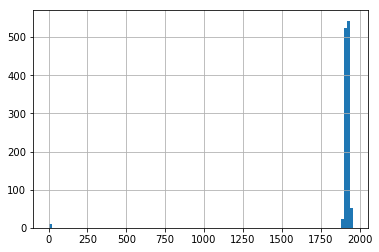

In [19]:
#Let's look at the distribution just to be sure.
urm['Year Built'].hist(bins=100) 

In [ ]:
#As suspected, the history of brick buildings in Seattle doesn't really stretch back 2000 years. The only outlying values are 0s.

In [20]:
#Let's count the number of zero entries in the 'Year Built' column. 
def num_zero(x):      #Define a new function num_zero() that sums the results of
    return sum(x==0)  #comparison statements between dataframe entries and zero

print ("values per column:") 
print (urm.apply(num_zero, axis=0)) #use function apply() to run num_zero() on each col. (axis=1 would run num_zero on each row)

values per column:
Preliminary Risk Category         0
Neighborhood                      0
Address                           0
Year Built                       10
No. Stories                       0
Retrofit Level                    0
Building Use                      0
Estimated Number of Occupants     0
Confirmation Source               0
dtype: int64


In [ ]:
#It seems we have 10 buldings with 0 for construction dates. 1151 total buildings implies 1141 have valid dates. Let's take the
#average value of the years these other buildings were built, round it off, and impute that to the missing entries.

In [21]:
urm['Year Built'].sum()/1141.0

1917.3006134969326

In [ ]:
#1917 seems like a reasonable year. Let's go with that.

In [22]:
#Replace 0 with 1917 in column 'Year Built'
urm['Year Built'].replace(0, 1917, inplace=True)

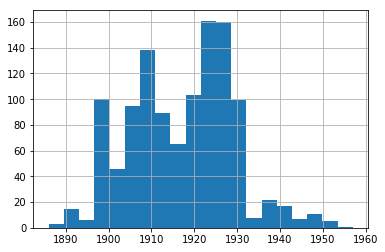

In [13]:
#Check the distribution to see if things make more sense now
urm['Year Built'].hist(bins=20) 

In [ ]:
#You can almost see a couple boom-and-bust construction cycles in the distribution, which is interesting in it's own right.

In [23]:
#Let's look at the distribution of building heights to check for outliers or nonsense values
urm['No. Stories'].value_counts() 

1     382
2     280
3     214
4     156
5      63
6      35
7      18
8       2
10      1
Name: No. Stories, dtype: int64

In [ ]:
#Nothing really unexpected here, though I'm surprised someone managed to erect a 10-story building without even using rebar.

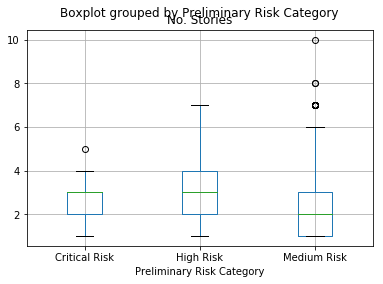

In [17]:
#Let's look at the building heights by risk category with a simple box plot
urm.boxplot(column='No. Stories', by = "Preliminary Risk Category")

In [ ]:
#Bearing in mind that the 'Critical Risk' category isn't really meaningful, it would seem that taller buildings are more risky,
#on the whole. This makes intuitive sense.

In [25]:
#It's widely known that the oldest buildings in Seattle are concentrated in the old Pioneer Square neighborhood, but let's see
#where the other URM buildings are distributed
urm['Neighborhood'].value_counts() 

Capitol Hill                                       142
Pioneer Square/Chinatown International District    122
Duwamish/SODO                                       79
Queen Anne                                          77
Univ Dist                                           74
Belltown                                            72
Cascade/Eastlake                                    72
Ballard                                             69
Downtown                                            60
First Hill                                          45
Greenwood/Phinney Ridge                             29
Columbia City                                       27
Central Area/Squire Park                            24
Wallingford                                         21
Green Lake                                          21
West Seattle Junction/Genesee Hill                  20
Ravenna/Bryant                                      17
Georgetown                                          17
Fremont   

In [ ]:
#Surprising that Capitol Hill actually has the most URM buildings. Maybe it's just because it's a big neighborhood.